<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Modelling-Xgboost" data-toc-modified-id="Modelling-Xgboost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling Xgboost</a></span></li><li><span><a href="#Model-Evaluation-using-dalex" data-toc-modified-id="Model-Evaluation-using-dalex-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation using dalex</a></span><ul class="toc-item"><li><span><a href="#Create-model-explainer" data-toc-modified-id="Create-model-explainer-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create model explainer</a></span></li><li><span><a href="#DATASET-LEVEL" data-toc-modified-id="DATASET-LEVEL-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span><a href="https://pbiecek.github.io/ema/dataset-level.html" target="_blank">DATASET LEVEL</a></a></span><ul class="toc-item"><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span><a href="https://pbiecek.github.io/ema/modelPerformance.html" target="_blank">Model Performance</a></a></span></li><li><span><a href="#Variable-Importance-using:-model_parts" data-toc-modified-id="Variable-Importance-using:-model_parts-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span><a href="https://pbiecek.github.io/ema/featureImportance.html" target="_blank">Variable Importance using: model_parts</a></a></span></li><li><span><a href="#model_profile:-accumulated" data-toc-modified-id="model_profile:-accumulated-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>model_profile: accumulated</a></span></li><li><span><a href="#Model-Profile:-Partial-(pdp)" data-toc-modified-id="Model-Profile:-Partial-(pdp)-8.2.4"><span class="toc-item-num">8.2.4&nbsp;&nbsp;</span>Model Profile: Partial (pdp)</a></span></li><li><span><a href="#Model-Profile:-partial-with-categorical" data-toc-modified-id="Model-Profile:-partial-with-categorical-8.2.5"><span class="toc-item-num">8.2.5&nbsp;&nbsp;</span>Model Profile: partial with categorical</a></span></li></ul></li><li><span><a href="#INSTANCE-LEVEL" data-toc-modified-id="INSTANCE-LEVEL-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span><a href="https://pbiecek.github.io/ema/InstanceLevelExploration.html" target="_blank">INSTANCE LEVEL</a></a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Variable-Attribution-(predict_parts)" data-toc-modified-id="Variable-Attribution-(predict_parts)-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Variable Attribution (predict_parts)</a></span></li><li><span><a href="#-predict_profile:-Ceteris-Paribus-Profiles" data-toc-modified-id="-predict_profile:-Ceteris-Paribus-Profiles-8.3.3"><span class="toc-item-num">8.3.3&nbsp;&nbsp;</span><a href="https://pbiecek.github.io/ema/ceterisParibus.html" target="_blank"> predict_profile: Ceteris Paribus Profiles</a></a></span></li></ul></li></ul></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction
Here, in this notebook I will use the model interpretation module [dalex](https://github.com/ModelOriented/DALEX) for the regression problem of house price prediction.

# Load the libraries

In [1]:
import time
time_start_notebook = time.time()

In [2]:
%%capture
import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install watermark
    !pip install dtreeviz

    # if we update existing module, we need to restart colab
    !pip install -U scikit-learn
    !pip install -U xgboost # dtreeviz needs 1.2


# Load the libraries

In [3]:
import numpy as np
import pandas as pd
import xgboost
import xgboost as xgb
import sklearn
from sklearn import metrics as skmetrics
import os
import joblib

# model eval
import graphviz
import dtreeviz
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree

# params
SEED = 100

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2020-11-24 

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit

pandas    1.1.4
sklearn   0.23.2
xgboost   1.2.1
watermark 2.0.2
graphviz  0.10.1
joblib    0.17.0
numpy     1.18.5



# Useful Functions

In [4]:
def adjustedR2(rsquared,nrows,ncols):
    return rsquared- (ncols-1)/(nrows-ncols) * (1-rsquared)

def print_regr_eval(ytest,ypreds,ncols):
    rmse = np.sqrt(skmetrics.mean_squared_error(ytest,ypreds))
    r2 = skmetrics.r2_score(ytest,ypreds)
    ar2 = adjustedR2(r2,len(ytest),ncols)
    evs = skmetrics.explained_variance_score(ytest, ypreds)

    print(f"""
             RMSE : {rmse:,.2f}
Explained Variance: {evs:.6f}
         R-Squared: {r2:,.6f}
Adjusted R-squared: {ar2:,.6f}

""")
    
def show_methods(obj, ncols=4):
    lst = [i for i in dir(obj) if i[0]!='_' ]
    df = pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')
    return df

# Parameters

In [5]:
if ENV_COLAB:
    path_git = 'https://raw.githubusercontent.com/bhishanpdl/Datasets/master/'
    project = 'Projects/King_County_Seattle_House_Price_Kaggle/'
    data_path_parent = path_git + project
else:
    data_path_parent = '../data/'

data_path_Xtrain = data_path_parent + 'processed/Xtrain.csv.zip'
data_path_ytrain = data_path_parent + 'processed/ytrain.csv'
data_path_Xtest = data_path_parent + 'processed/Xtest.csv.zip'
data_path_ytest = data_path_parent + 'processed/ytest.csv'
target = 'price'
train_size = 0.8

print(data_path_Xtest)

https://raw.githubusercontent.com/bhishanpdl/Datasets/master/Projects/King_County_Seattle_House_Price_Kaggle/processed/Xtest.csv.zip


# Load the Data

In [6]:
df_Xtrain  = pd.read_csv(data_path_Xtrain,compression='zip')
ser_ytrain = pd.read_csv(data_path_ytrain,header=None)
ytrain  = np.array(ser_ytrain).flatten()
ytrain_log1p = np.log1p(ytrain)

df_Xtest  = pd.read_csv(data_path_Xtest,compression='zip')
ser_ytest = pd.read_csv(data_path_ytest,header=None)
ytest  = np.array(ser_ytest).flatten()

features = list(df_Xtest.columns)

s = f"""
df_Xtest  = {df_Xtest.shape}
ytest     = {ytest.shape}

"""
print(s)

display(df_Xtest.head(2))
display(ser_ytest.head(2))

assert df_Xtest.shape[0] == ytest.shape[0]


df_Xtest  = (4323, 67)
ytest     = (4323,)




age  age_after_renovation  ...  yr_sales   zipcode
0 -1.372335             -1.316486  ... -0.693043 -1.422563
1 -0.084817             -0.005269  ...  1.442912 -1.441324

[2 rows x 67 columns]

0
0  285000.0
1  239950.0

# Modelling Xgboost

In [7]:
# saved models
if ENV_COLAB:
    !mkdir -p ../models
    !wget https://github.com/bhishanpdl/Datasets/blob/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump?raw=true
    !mv model_xgb_logtarget.dump?raw=true ../models/model_xgb_logtarget.dump
    !ls ../models
    !du -sh ../models/model_xgb_logtarget.dump

    path_model_xgb = '../models/model_xgb_logtarget.dump'
    model = xgboost.XGBRegressor()
    model.load_model(path_model_xgb)

    ypreds_log1p = model.predict(df_Xtest)
    ypreds = np.expm1(ypreds_log1p)

    print('ytest:', ytest[:3])
    print('ypreds: ', ypreds[:3]) # **WARNING: This gives empty ypreds**

--2020-11-24 00:29:14--  https://github.com/bhishanpdl/Datasets/blob/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bhishanpdl/Datasets/raw/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump [following]
--2020-11-24 00:29:15--  https://github.com/bhishanpdl/Datasets/raw/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bhishanpdl/Datasets/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump [following]
--2020-11-24 00:29:15--  https://raw.githubusercontent.com/bhishanpdl/Datasets/master/Projects/Kin

In [8]:
# saved models
use_joblib = 0
if use_joblib:
    !mkdir -p ../models
    !wget https://github.com/bhishanpdl/Datasets/blob/master/Projects/King_County_Seattle_House_Price_Kaggle/models/model_xgb_logtarget.dump?raw=true
    !mv model_xgb_logtarget.joblib?raw=true ../models/model_xgb_logtarget.joblib
    !ls ../models
    !du -sh ../models/model_xgb_logtarget.joblib

    path_model_xgb = '../models/model_xgb_logtarget.joblib'
    model = xgboost.XGBRegressor()
    model.load_model(path_model_xgb)

    ypreds_log1p = model.predict(df_Xtest)
    ypreds = np.expm1(ypreds_log1p)

    print('ytest:', ytest[:3])
    print('ypreds: ', ypreds[:3]) # **WARNING: This gives empty ypreds**

In [9]:
%%time
train_model = 0
if train_model:
    params_xgb = dict(n_jobs=-1,
                    random_state=SEED,
                    objective='reg:squarederror',
                    n_estimators=1200,
                    max_depth=3,  # default 6
                    reg_alpha=1,  # default alpha = 0,  alias reg_alpha
                    reg_lambda=5, # default lambda = 1, alias reg_lambda
                    subsample=1,  # default 1
                    gamma=0, # default gamma=0 alias min_split_loss
                    min_child_weight=1, # default 1
                    colsample_bytree=1, # default 1
                    learning_rate=0.1,   # default eta = 0.3
                    tree_method = 'auto', # default auto, use gpu_hist
                    )

    model = xgboost.XGBRegressor(**params_xgb)
    model.fit(df_Xtrain, ytrain_log1p)

    ypreds_log1p = model.predict(df_Xtest)
    ypreds = np.expm1(ypreds_log1p)

    print('ytest:', ytest[:3])
    print('ypreds: ', ypreds[:3])
    print_regr_eval(ytest,ypreds,df_Xtest.shape[1])

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


# Model evaluation using xgboost

In [10]:
show_methods(model)

0  ...                    3
0                  apply  ...         random_state
1             base_score  ...            reg_alpha
2                booster  ...           reg_lambda
3                  coef_  ...           save_model
4      colsample_bylevel  ...     scale_pos_weight
5       colsample_bynode  ...                score
6       colsample_bytree  ...           set_params
7           evals_result  ...            subsample
8   feature_importances_  ...          tree_method
9                    fit  ...  validate_parameters
10                 gamma  ...            verbosity

[11 rows x 4 columns]

In [11]:
bst = model.get_booster()
bst.trees_to_dataframe().head(2)

Tree  Node   ID Feature     Split  Yes   No Missing    Gain    Cover
0     0     0  0-0   grade  0.716166  0-1  0-2     0-1  689.75  17290.0
1     0     1  0-1     lat -0.194376  0-3  0-4     0-3  105.75  13905.0

In [12]:
bst.trees_to_dataframe()['Tree'].nunique()

1200

In [13]:
bst.trees_to_dataframe().query("Tree == 0")

Tree  Node   ID Feature     Split  Yes   No Missing        Gain    Cover
0     0     0  0-0   grade  0.716166  0-1  0-2     0-1  689.750000  17290.0
1     0     1  0-1     lat -0.194376  0-3  0-4     0-3  105.750000  13905.0
2     0     2  0-2    Leaf       NaN  NaN  NaN     NaN    1.313649   3385.0
3     0     3  0-3    Leaf       NaN  NaN  NaN     NaN    1.208724   5749.0
4     0     4  0-4    Leaf       NaN  NaN  NaN     NaN    1.260315   8156.0

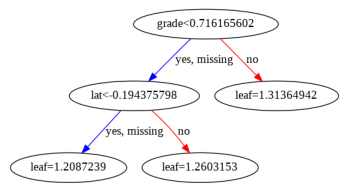

In [14]:
xgb.plot_tree(model)

# Model Evaluation using dtreeviz

- https://github.com/parrt/dtreeviz

```python
ShadowXGBDTree(self, 
booster:xgboost.core.Booster,
tree_index:int,
x_data,
y_data,
feature_names:List[str]=None,
target_name:str=None,
class_names:(typing.List[str],typing.Mapping[int, str])=None)
```

In [15]:
import graphviz
from dtreeviz import trees as dtrees
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree

In [16]:
show_methods(dtrees)

0  ...                       3
0                   Color  ...                 rgb2hex
1                DTreeViz  ...       rtreeviz_bivar_3D
2                    List  ...  rtreeviz_bivar_heatmap
3                 Mapping  ...         rtreeviz_univar
4                NUM_BINS  ...                     run
5                  Number  ...               scale_SVG
6                PLATFORM  ...                tempfile
7                    Path  ...                    tree
8           ShadowDecTree  ...                    view
9       ShadowDecTreeNode  ...      viz_leaf_criterion
10                  Tuple  ...        viz_leaf_samples
11  add_classifier_legend  ...         viz_leaf_target

[12 rows x 4 columns]

In [17]:
# help(ShadowXGBDTree)

In [18]:
bst_shadow = ShadowXGBDTree(bst, tree_index=1,
    x_data=df_Xtrain, y_data=ytrain_log1p,
    feature_names=features, target_name=target)

## dtreeviz

```python
dtreeviz(tree_model,
x_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
 
y_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
feature_names:List[str]=None,
target_name:str=None,
class_names:(typing.Mapping[numbers.Number, str], typing.List[str])=None,
tree_index:int=None,
precision:int=2,
orientation:('TD', 'LR')='TD',
instance_orientation:('TD', 'LR')='LR',
show_root_edge_labels:bool=True,
show_node_labels:bool=False,
show_just_path:bool=False,
fancy:bool=True,
histtype:('bar', 'barstacked', 'strip')='barstacked',
highlight_path:List[int]=[],
X:numpy.ndarray=None,
max_X_features_LR:int=10,
max_X_features_TD:int=20,
label_fontsize:int=12,
ticks_fontsize:int=8,
fontname:str='Arial',
colors:dict=None,
scale=1.0) -> dtreeviz.trees.DTreeViz

```

In [19]:
# help(dtrees.dtreeviz)

In [20]:
dtrees.dtreeviz(bst_shadow)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


# viz_leaf_samples

```python
viz_leaf_samples(tree_model,
x_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
feature_names:List[str]=None,
tree_index:int=None,
figsize:tuple=(10, 5),
display_type:str='plot',
colors:dict=None,
fontsize:int=14,
fontname:str='Arial',
grid:bool=False,
bins:int=10,
min_samples:int=0,
max_samples:int=None)

```

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


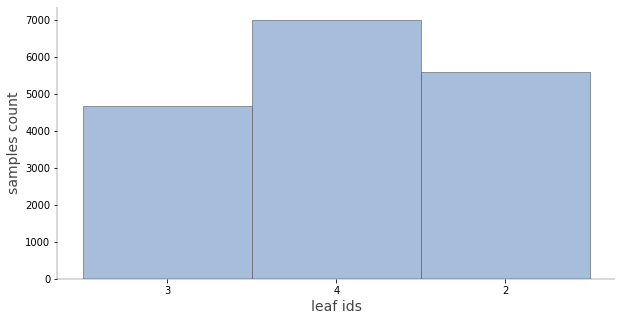

In [21]:
dtrees.viz_leaf_samples(bst, df_Xtrain,feature_names=features,tree_index=1)


# describe_node_sample
```python
describe_node_sample(tree_model,
node_id:int,
x_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
feature_names:List[str]=None,
tree_index:int=None)
```

In [22]:
dtrees.describe_node_sample(bst, node_id=1,
                            x_data=df_Xtrain,
                            feature_names=features,
                            tree_index=1).iloc[:,:5]

age  ...       age_cat
count  11685.000000  ...  11685.000000
mean       0.181673  ...      0.178939
std        0.984658  ...      0.987304
min       -1.507863  ...     -1.320662
25%       -0.593048  ...     -0.533437
50%        0.152358  ...      0.253788
75%        0.796117  ...      0.647401
max        2.422456  ...      2.221851

[8 rows x 5 columns]

## explain_prediction_path

```python
explain_prediction_path(tree_model,
x:numpy.ndarray,
x_data=None,
y_data=None,
explanation_type:('plain_english', 'sklearn_default')='plain_english',
feature_names:List[str]=None,
target_name:str=None,
class_names:(typing.Mapping[numbers.Number, str],
typing.List[str])=None,
tree_index:int=None)
```

In [23]:
row = df_Xtrain.iloc[10]
row.head()


age                        -0.694694
age_after_renovation       -0.626372
age_after_renovation_cat   -0.463220
age_after_renovation_sq    -0.671013
age_cat                    -0.533437
Name: 10, dtype: float64

In [24]:
s = dtrees.explain_prediction_path(bst_shadow, row,
    explanation_type="plain_english",tree_index=9)

print(s)

lat < -0.21
log1p_sqft_living < 0.48



## viz_leaf_target

```python
viz_leaf_target(tree_model,
x_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
y_data:(<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>)=None,
feature_names:List[str]=None,
target_name:str=None,
tree_index:int=None,
show_leaf_labels:bool=True,
colors:dict=None,
markersize:int=50,
label_fontsize:int=14,
fontname:str='Arial',
precision:int=1,
figsize:tuple=None,
grid:bool=False,
prediction_line_width:int=2)
```

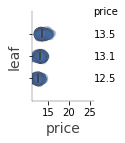

In [25]:
dtrees.viz_leaf_target(bst, df_Xtrain, ytrain_log1p,
    feature_names=features,
    target_name=target,
    tree_index=1)

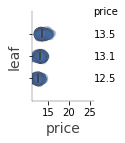

In [26]:
dtrees.viz_leaf_target(bst_shadow)

In [27]:
# features_reg_univar = ["age"]
# target_reg_univar = "price"

# dtrain_reg_univar = xgb.DMatrix(df_Xtrain[features_reg_univar], ytrain_log1p)

# params_reg_univar = {"max_depth":3,
#                      "eta":0.05,
#                      "objective":"reg:squarederror",
#                      "subsample":1}

# xgb_model_reg_univar = xgb.train(params=params_reg_univar,
#                                 dtrain=dtrain_reg_univar,
#                                 num_boost_round=8)

# xgb_shadow_reg_univar = ShadowXGBDTree(xgb_model_reg_univar, 1,
#     df_Xtrain[features_reg_univar], ytrain_log1p,
#     features_reg_univar, target_reg_univar)

# dtrees.rtreeviz_univar(xgb_shadow_reg_univar,
#     df_Xtrain[features_reg_univar],ytrain_log1p,
#     features_reg_univar, target_reg_univar)

err = """
VisualisationNotYetSupportedError: get_min_samples_leaf() is not implemented yet for XGBoost
"""

# Time Taken

In [28]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 38 secs
